<a href="https://colab.research.google.com/github/Yugi-Seong/CNN/blob/main/Lec00_PytorchBasics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Codes are adapted from "https://github.com/yunjey/pytorch-tutorial"

In [1]:
from google.colab import drive
drive.mount('/content/drive')

# import sys
# sys.path.append('/content/drive/My Drive/ColabNotebooks/Lecture/DeepLearning/Codes')

Mounted at /content/drive


In [2]:
cd '/content/drive/MyDrive/CNN'

/content/drive/MyDrive/CNN


# 새 섹션

In [3]:
import torch 
import torchvision
import torch.nn as nn 
import numpy as np
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

In [ ]:

# ================================================================== #
#                         Table of Contents                          #
# ================================================================== #

# 1. Basic autograd example 1               (Line 25 to 39)
# 2. Basic autograd example 2               (Line 46 to 83)
# 3. Loading data from numpy                (Line 90 to 97)
# 4. Input pipline                          (Line 104 to 129)
# 5. Input pipline for custom dataset       (Line 136 to 156)
# 6. Pretrained model                       (Line 163 to 176)
# 7. Save and load model                    (Line 183 to 189) 

In [5]:
a = torch.zeros(2,3)
print(a)

input = torch.empty(2, 3)
b = torch.zeros_like(input) #똑같은 행렬 하나더 생성 
print(b)

c = np.array([[1,2], [3,4], [5,6]], dtype=np.int16)
print(c)

d = c[...,0] 
print(d)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])
[[1 2]
 [3 4]
 [5 6]]
[1 3 5]


In [6]:

# ================================================================== #
#                     1. Basic autograd example 1                    #
# ================================================================== #
print("==== 1. Basic autograd example 1 ====")
# Create tensors.
x = torch.tensor(1., requires_grad=True)  # 파이토치에서 데이터를 다루는 단위 : tensor   
w = torch.tensor(2., requires_grad=True)  #backpro를 하기 위해 : requires_grad 
b = torch.tensor(3., requires_grad=True)

# Build a computational graph.
y = w * x + b    # y = 2 * x + 3

# Compute gradients.
y.backward()    # 그래디언트를 계산 

# Print out the gradients.
print(x.grad)    # x.grad = 2 
print(w.grad)    # w.grad = 1 
print(b.grad)    # b.grad = 1 


==== 1. Basic autograd example 1 ====
tensor(2.)
tensor(1.)
tensor(1.)


In [ ]:

# ================================================================== #
#                    2. Basic autograd example 2                     #
# ================================================================== #
torch.manual_seed(1)  # 언제, 몇번 실행하든지 같은 값으로 출력 

print("==== 2. Basic autograd example 2 ====")
# Create tensors of shape (10, 3) and (10, 2).
x = torch.randn(10, 3)
y = torch.randn(10, 2)

# Build a fully connected layer.
linear = nn.Linear(3, 2)  
print ('w: ', linear.weight)
print ('b: ', linear.bias)

# Build loss function and optimizer.
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)


#############################################
#### send image,label, model to device ######
linear = linear.to(device)
x = x.to(device)
y = y.to(device)
##############################################

# Forward pass.
pred = linear(x)

# Compute loss.
loss = criterion(pred, y) 
print('loss: ', loss.item())

# Backward pass.
loss.backward()

# Print out the gradients.
print ('dL/dw: ', linear.weight.grad) 
print ('dL/db: ', linear.bias.grad)

# 1-step gradient descent.
optimizer.step()

# You can also perform gradient descent at the low level.
# linear.weight.data.sub_(0.01 * linear.weight.grad.data)
# linear.bias.data.sub_(0.01 * linear.bias.grad.data)

# Print out the loss after 1-step gradient descent.
pred = linear(x)
loss = criterion(pred, y)
print('loss after 1 step optimization: ', loss.item())

==== 2. Basic autograd example 2 ====
w:  Parameter containing:
tensor([[ 0.0351, -0.0984,  0.3391],
        [-0.3344, -0.5133,  0.4202]], requires_grad=True)
b:  Parameter containing:
tensor([-0.0856,  0.3247], requires_grad=True)
loss:  1.9136215448379517
dL/dw:  tensor([[ 0.1452, -1.3571,  0.6949],
        [-0.0937, -1.7299,  0.8375]])
dL/db:  tensor([-0.3319,  0.3793])
loss after 1 step optimization:  1.8512353897094727


In [ ]:

# ================================================================== #
#                     3. Loading data from numpy                     #
# ================================================================== #
print("==== 3. Loading data from numpy ====")
# Create a numpy array.
x = np.array([[1, 2], [3, 4]])

# Convert the numpy array to a torch tensor.
y = torch.from_numpy(x)

# Convert the torch tensor to a numpy array.
z = y.numpy()


==== 3. Loading data from numpy ====


==== 4. Input pipline ====
Files already downloaded and verified
torch.Size([3, 32, 32])
6


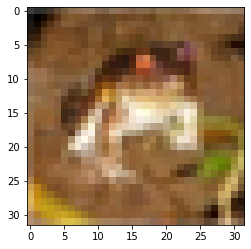

In [ ]:
# [Batch Size, Channel, Width, Height] => [Width, Height, Channel]
def custom_imshow(img): 
  img = img.numpy() 
  plt.imshow(np.transpose(img, (1, 2, 0))) 
  plt.show()

# ================================================================== #
#                         4. Input pipline                           #
# ================================================================== #
print("==== 4. Input pipline ====")
# Download and construct CIFAR-10 dataset.
train_dataset = torchvision.datasets.CIFAR10(root='./data/',
                                             train=True, 
                                             transform=transforms.ToTensor(),
                                             download=True)

# Fetch one data pair (read data from disk).
image, label = train_dataset[0]
print (image.size())
print (label)

# show the first image
custom_imshow(image)

# Data loader (this provides queues and threads in a very simple way).
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64, 
                                           shuffle=True)

# When iteration starts, queue and thread start to load data from files.
data_iter = iter(train_loader)

# Mini-batch images and labels.
images, labels = data_iter.next()

# Actual usage of the data loader is as below.
for images, labels in train_loader:
    # Training code should be written here.
    pass


In [ ]:

# ================================================================== #
#                5. Input pipline for custom dataset                 #
# ================================================================== #
print("==== 5. Input pipline for custom dataset ====")
# # You should build your custom dataset as below.
# class CustomDataset(torch.utils.data.Dataset):
#     def __init__(self):
#         # TODO
#         # 1. Initialize file paths or a list of file names. 
#         pass
#     def __getitem__(self, index):
#         # TODO
#         # 1. Read one data from file (e.g. using numpy.fromfile, PIL.Image.open).
#         # 2. Preprocess the data (e.g. torchvision.Transform).
#         # 3. Return a data pair (e.g. image and label).
#         pass
#     def __len__(self):
#         # You should change 0 to the total size of your dataset.
#         return 0 

# # You can then use the prebuilt data loader. 
# custom_dataset = CustomDataset()
# train_loader = torch.utils.data.DataLoader(dataset=custom_dataset,
#                                            batch_size=64, 
#                                            shuffle=True)


==== 5. Input pipline for custom dataset ====


In [ ]:

# ================================================================== #
#                        6. Pretrained model                         #
# ================================================================== #
print("==== 6. Pretrained model ====")
# Download and load the pretrained ResNet-18.
resnet = torchvision.models.resnet18(pretrained=True)

# If you want to finetune only the top layer of the model, set as below.
for param in resnet.parameters():
    param.requires_grad = False

# Replace the top layer for finetuning.
resnet.fc = nn.Linear(resnet.fc.in_features, 100)  # 100 is an example.

# Forward pass.
images = torch.randn(64, 3, 224, 224)
outputs = resnet(images)
print (outputs.size())     # (64, 100)

==== 6. Pretrained model ====


Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth



torch.Size([64, 100])


In [ ]:

# ================================================================== #
#                      7. Save and load the model                    #
# ================================================================== #
print("==== 7. Save and load the model ====")
# Save and load the entire model.
torch.save(resnet, 'model.ckpt')
model = torch.load('model.ckpt')

# Save and load only the model parameters (recommended).
torch.save(resnet.state_dict(), 'params.ckpt')
resnet.load_state_dict(torch.load('params.ckpt'))

print("==== End ====")
print("         ")

==== 7. Save and load the model ====
==== End ====
         
